In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')
%matplotlib inline
plt.rcParams['figure.figsize'] = 8,4
import seaborn as sns

# Task 1: What are the types of data and the levels of measurement of the following variables: Cust ID, Mortgage, Year of sale.

In [2]:
df = pd.read_csv('california.csv')
df[['Customer ID','Mortgage','Year of sale']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 267 entries, 0 to 266
Data columns (total 3 columns):
Customer ID     195 non-null object
Mortgage        195 non-null object
Year of sale    195 non-null float64
dtypes: float64(1), object(2)
memory usage: 6.3+ KB


# Task 2: Create a histogram which represents the Price variable. Choose interval width (bins) of length $100,000. 

In [3]:
print(df['Price'].min())
print(df['Price'].max())
def price_bin (x):
    if x <= 217564.07: return ('bin 1')
    elif x <= 317564.07: return ('bin 2')
    elif x <= 417564.07: return ('bin 3')
    else: return ('bin 4')

117564.07
538271.74


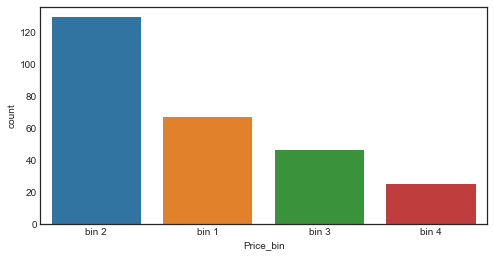

In [4]:
df['Price_bin'] = df['Price'].apply(price_bin)
sns.countplot(df['Price_bin'], order=df['Price_bin'].value_counts().index)

# Task 3: Create a scatter plot showing the relationship between Price and Area. Use the data on all apartments, no matter if sold or not. Interpret the results.

Text(0,0.5,'Price')

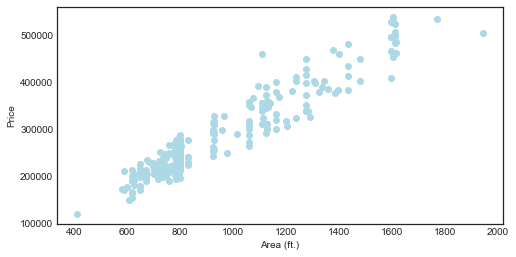

In [5]:
plt.scatter(df['Area (ft.)'],df['Price'], c='lightblue')
plt.xlabel('Area (ft.)')
plt.ylabel('Price')

# Task 4: Create a frequency distribution table, where you list all the countries from which the company has buyers. Count the the relative frequency and the cumulative frequency. 

In [6]:
fd = df.groupby('Country')['Price'].agg(['count'])
fd.reset_index(inplace=True)
fd = fd[['Country','count']]
fd.sort_values(by=['count','Country'], ascending=[False,True], inplace=True)

In [7]:
fd['Relative frequency'] = fd['count'] / fd['count'].sum()
fd['Cumulative frequency'] = fd['Relative frequency'].cumsum()
fd

,Country,count,Relative frequency,Cumulative frequency
7,USA,177,0.907692,0.907692
1,Canada,7,0.035897,0.943590
5,Russia,4,0.020513,0.964103
0,Belgium,2,0.010256,0.974359
6,UK,2,0.010256,0.984615
2,Denmark,1,0.005128,0.989744
3,Germany,1,0.005128,0.994872
4,Mexico,1,0.005128,1.000000


# Task 5: Create a Pareto diagram representing the data.

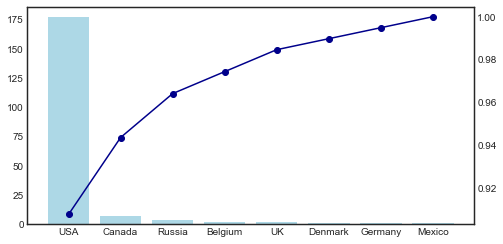

In [8]:
fig, ax1 = plt.subplots()
ax1.bar(fd['Country'], fd['count'], color='lightblue')
ax2 = ax1.twinx()
ax2.plot(fd['Country'], fd['Cumulative frequency'], color='darkblue', marker='o')

# Task 6: Calculate the mean, median, mode, skewness, variance and standard deviation of Price for all apartments, no matter if sold or not.

In [9]:
print("mean = \t\t",round(df['Price'].mean(),2))
print("median = \t",round(df['Price'].median(),2))
print("skewness = \t",round(df['Price'].skew(),2))
print("variance = \t",round(df['Price'].var(),2))
print("sd = \t\t",round(df['Price'].std(),2))

mean = 		 281171.9
median = 	 249075.66
skewness = 	 1.1
variance = 	 7942217728.65
sd = 		 89119.12


# Task 7: Calculate the covariance and correlation coefficient between Price and Area, no matter if the apartment is sold or not. 

In [10]:
df[['Area (ft.)','Price']].corr()

,Area (ft.),Price
Area (ft.),1.000000,0.951087
Price,0.951087,1.000000


In [11]:
df[['Area (ft.)','Price']].cov()

,Area (ft.),Price
Area (ft.),8.116517e+04,2.414772e+07
Price,2.414772e+07,7.942218e+09
